In [1]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
%matplotlib inline

In [2]:
'''
Data links: 
S&P 500: https://www.kaggle.com/kp4920/s-p-500-stock-data-time-series-analysis
Yahoo S&P: https://finance.yahoo.com/quote/%5EGSPC/history/ 
'''
#Import the csv
data = pd.read_csv("all_stocks_5yr.csv", index_col = 'date', parse_dates=["date"])
sp_data = pd.read_csv("SP500.csv", index_col = 'Date', parse_dates=["Date"])

In [3]:
data.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
data.tail()

,open,high,low,close,volume,Name
date,,,,,,
2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [5]:
data.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
data.shape

(619040, 6)

In [7]:
#Check for missing stock data:
missing_data = data.isnull().sum()
missing_data

open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [ ]:
data.groupby('Name').min()

In [ ]:
data.groupby('Name').max()

In [ ]:
data.groupby('Name').mean()

In [ ]:
data.groupby('Name').describe()

In [8]:
data.min()

open      1.62
high      1.69
low        1.5
close     1.59
volume       0
Name         A
dtype: object

In [9]:
data.max()

open           2044
high        2067.99
low         2035.11
close          2049
volume    618237630
Name            ZTS
dtype: object

In [10]:
print("Avg open: ", data['open'].mean())
print("Avg high: ", data['high'].mean())
print("Avg low: ", data['low'].mean())
print("Avg close: ", data['close'].mean())
print("Avg volume: ", data['volume'].mean())

Avg open:  83.02333431454568
Avg high:  83.77831069346551
Avg low:  82.25609641375557
Avg close:  83.04376276476357
Avg volume:  4321823.395568945


In [11]:
data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [12]:
#Interquartile Range on close prices
data.describe()['close']['75%']-data.describe()['close']['25%']

54.164999999999999

Text(0.5,1,'First Degree Lag on All Close Prices')

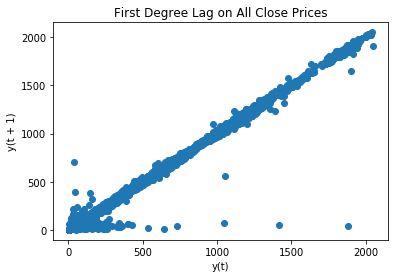

In [13]:
#Positive autocorrelation on all close prices in the dataset
lag_plot(data.close, lag=1)
plt.title('First Degree Lag on All Close Prices')

Text(0.5,1,'Third Degree Lag on All Close Prices')

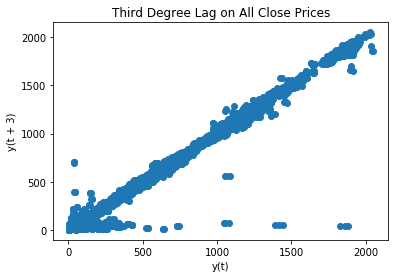

In [14]:
#Third degree lag on all close
lag_plot(data.close, lag=3)
plt.title('Third Degree Lag on All Close Prices')

Text(0.5,1,'First Degree Lag on All Open Prices')

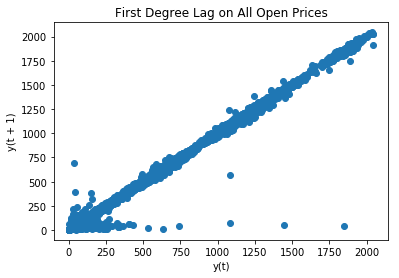

In [15]:
#Positive autocorrelation on all open prices in the dataset
lag_plot(data.open, lag=1)
plt.title('First Degree Lag on All Open Prices')

Text(0.5,1,'Third Degree Lag on All Close Prices')

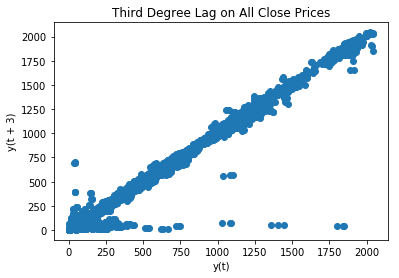

In [16]:
#Third degree lag on all open
lag_plot(data.open, lag=3)
plt.title('Third Degree Lag on All Close Prices')

Text(0.5,1,'First Degree Lag on All Volumes')

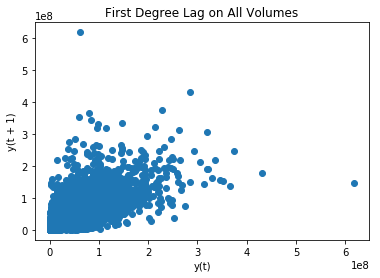

In [17]:
#Lag plot of all volume, very random
lag_plot(data.volume, lag=1)
plt.title('First Degree Lag on All Volumes')

Text(0.5,1,'Third Degree Lag on All Volumes')

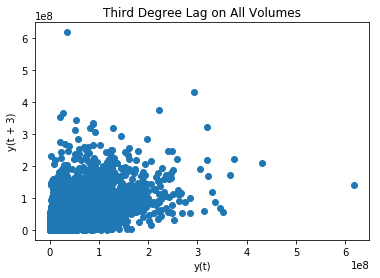

In [18]:
#Third degree lag on all volume
lag_plot(data.volume, lag=3)
plt.title('Third Degree Lag on All Volumes')

In [19]:
#List of all stocks
stock_symbols = []
for name in data.Name:
    if name not in stock_symbols:
        stock_symbols.append(name)
#Alternatively
stock_names = data.Name.unique()

In [ ]:
'''
Takes a while to load
'''
#Close prices of all stocks on one plot
# for stock in stock_symbols:
#     data[data['Name'] == stock].close.plot()
#     plt.ylabel("Close Price")

In [ ]:
'''
Takes a while to load
'''
#Open prices of all stocks on one plot
# for stock in stock_symbols:
#     data[data['Name'] == stock].open.plot()
#     plt.ylabel("Open Price")

In [ ]:
'''
Takes a while to load
'''
#Volume of all stocks on one plot
# for stock in stock_symbols:
#     data[data['Name'] == stock].volume.plot()
#     plt.ylabel("Volume")

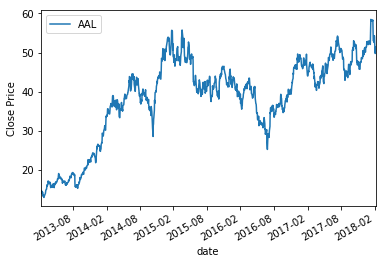

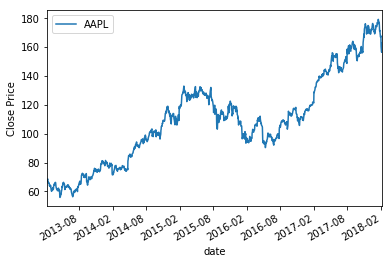

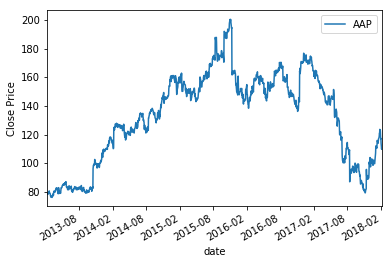

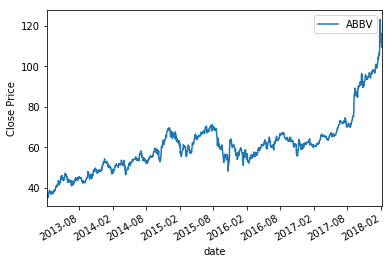

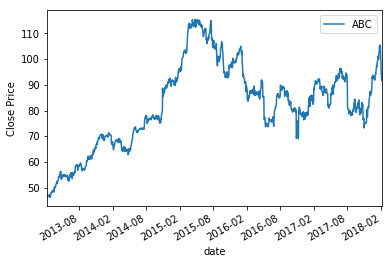

In [20]:
#First 5 stocks, plots of closing prices throughout time
for stock in stock_symbols[0:5]:
    plt.figure()
    data[data['Name'] ==  stock].close.plot(label=stock)
    plt.legend(loc='best')
    plt.ylabel("Close Price")
    plt.show()
    

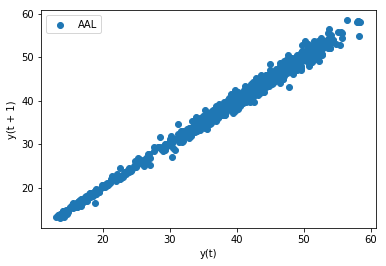

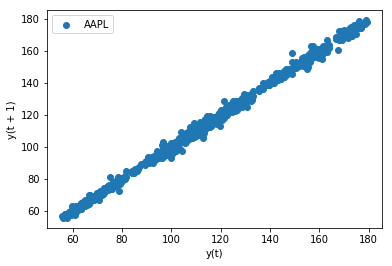

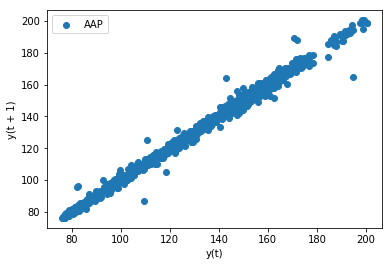

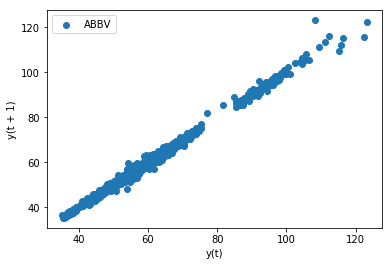

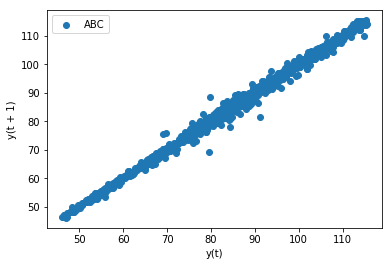

In [21]:
#First 5 stocks, plots of closing prices throughout time
for stock in stock_symbols[0:5]:
    plt.figure()
    lag_plot(data[data['Name'] == stock].close, label = stock)
    plt.legend(loc='best')

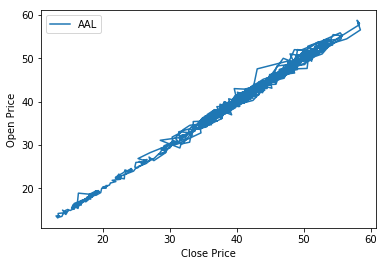

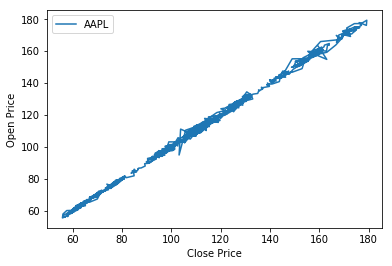

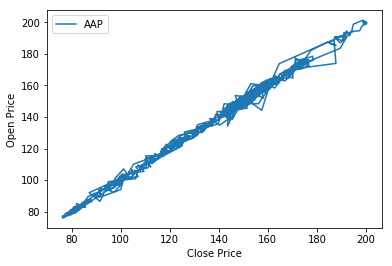

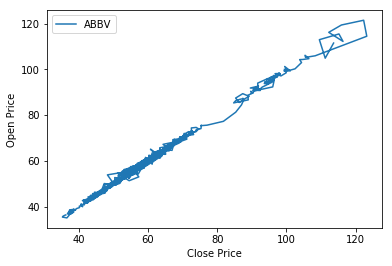

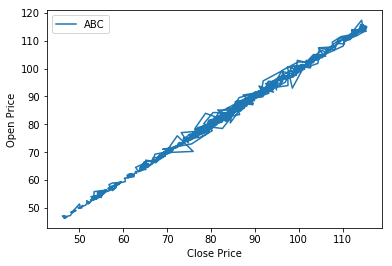

In [22]:
#Plots of close vs open for the first 5 stocks
for stock in stock_symbols[0:5]:
    x = data[data['Name'] == stock].close.values
    y = data[data['Name'] == stock].open.values
    plt.figure()
    plt.plot(x,y, label=stock)
    plt.xlabel('Close Price')
    plt.ylabel('Open Price')
    plt.legend(loc='best')    

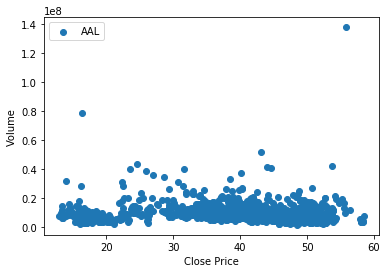

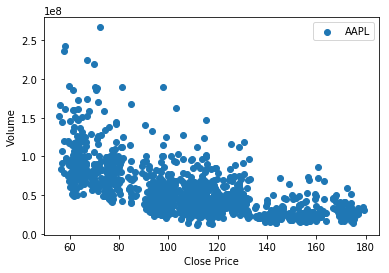

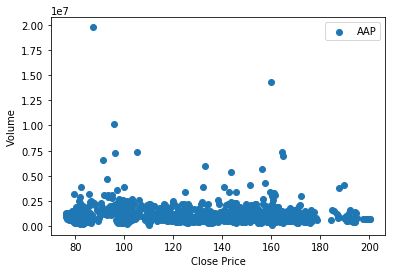

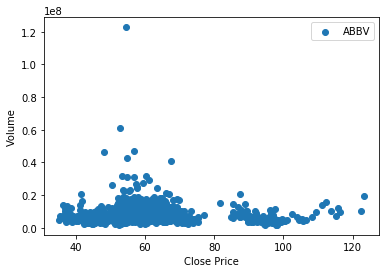

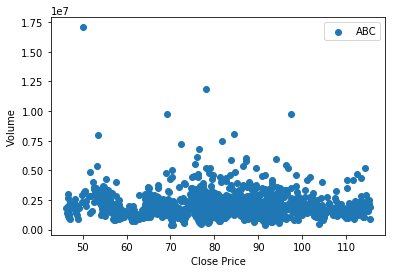

In [23]:
#Plots of close vs volume for the first 5 stocks
for stock in stock_symbols[0:5]:
    x = data[data['Name'] == stock].close.values
    y = data[data['Name'] == stock].volume.values
    plt.figure()
    plt.scatter(x,y, label=stock)
    plt.xlabel('Close Price')
    plt.ylabel('Volume')
    plt.legend(loc='best')   

In [25]:
#Padding the data by forward propagating
#Only testing on AAPL
aapl_data = data[data.Name=='AAPL'].asfreq('D', method='pad')

In [38]:
#aapl_data

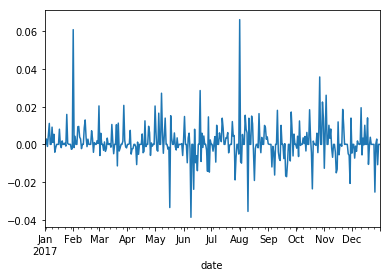

In [27]:
#Percent change plot of AAPL throughout 2017
aapl_data["01/01/2017":"12/31/2017"].close.pct_change().plot()

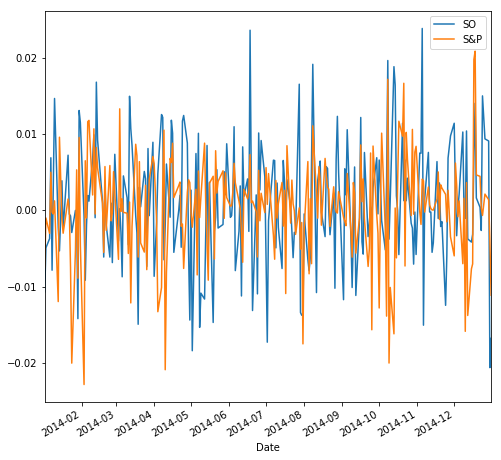

In [28]:
#Plot of SO stock percent change overlayed on S&P percent change
#Percent change = (close-open)/(open)

close_price = data[data['Name'] == 'SO']['2014'].close
open_price = data[data['Name'] == 'SO']['2014'].open

sp_close_price = sp_data.Close['2014']
sp_open_price = sp_data.Open['2014']

((close_price-open_price)/open_price).plot(label = 'SO', figsize = (8,8))

((sp_close_price - sp_open_price)/sp_open_price).plot(label = 'S&P')

plt.legend(loc='best')

In [ ]:
#List of all stocks grouped by name
#About 1259 entries for most stocks
list(data.groupby('Name'))


In [ ]:
#2013 close data
list(data['2013'].groupby('Name').close)


In [ ]:
#2014 close data
list(data['2014'].groupby('Name').close)

In [ ]:
#2015 close data
list(data['2015'].groupby('Name').close)

In [ ]:
#2016 close data
list(data['2016'].groupby('Name').close)

In [ ]:
#2017 close data
list(data['2017'].groupby('Name').close)

In [ ]:
#2018 close data
list(data['2018'].groupby('Name').close)

# Slicing by dates
Just testing the functionality

In [36]:
#data["12/01/2015":"01/01/2016"].groupby('Name').close.plot()

In [37]:
#data["12/01/2015": "01/01/2017"]

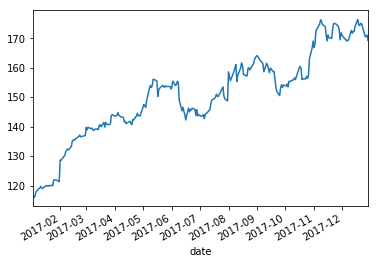

In [29]:
data[data.Name == 'AAPL']["2017"].close.plot()

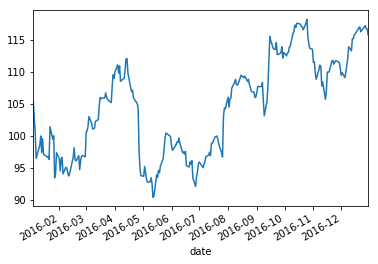

In [30]:
data[data.Name == 'AAPL']["2016"].close.plot()

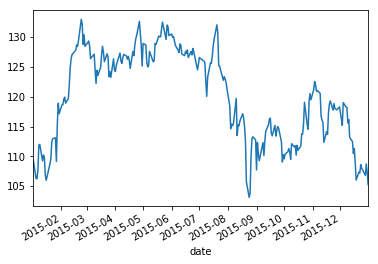

In [31]:
data[data.Name == 'AAPL']["2015"].close.plot()

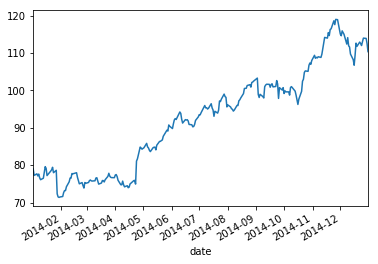

In [32]:
data[data.Name == 'AAPL']["2014"].close.plot()

In [34]:
data[data['Name'] == 'AAPL'].close.pct_change()